# Title: Champions League 2008 - 2009 - Predictions
## Author: Martin Ngoh 
### Date: 05/19/2024

In [1]:
# Import Packages 
import json 
import numpy as np
import pandas as pd 
from xgboost import XGBRegressor
from helper import residuals_plot, regression_acc

In [8]:
# Load Data 
df = pd.read_csv('champions_league_team_data_raw_2024.csv')
train_cols = np.load('train_cols.npy', allow_pickle=True)
test_df = df[train_cols]

In [9]:
# Load the model from the JSON file
xgb = XGBRegressor()
xgb.load_model('xgb_model.json')

In [10]:
# Predict on test data 
preds = xgb.predict(test_df)

/Users/Martin1/Desktop/GIT/champions_league_22/helper.py:84: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=actuals, y=preds, ax=axes[1], palette='cool')


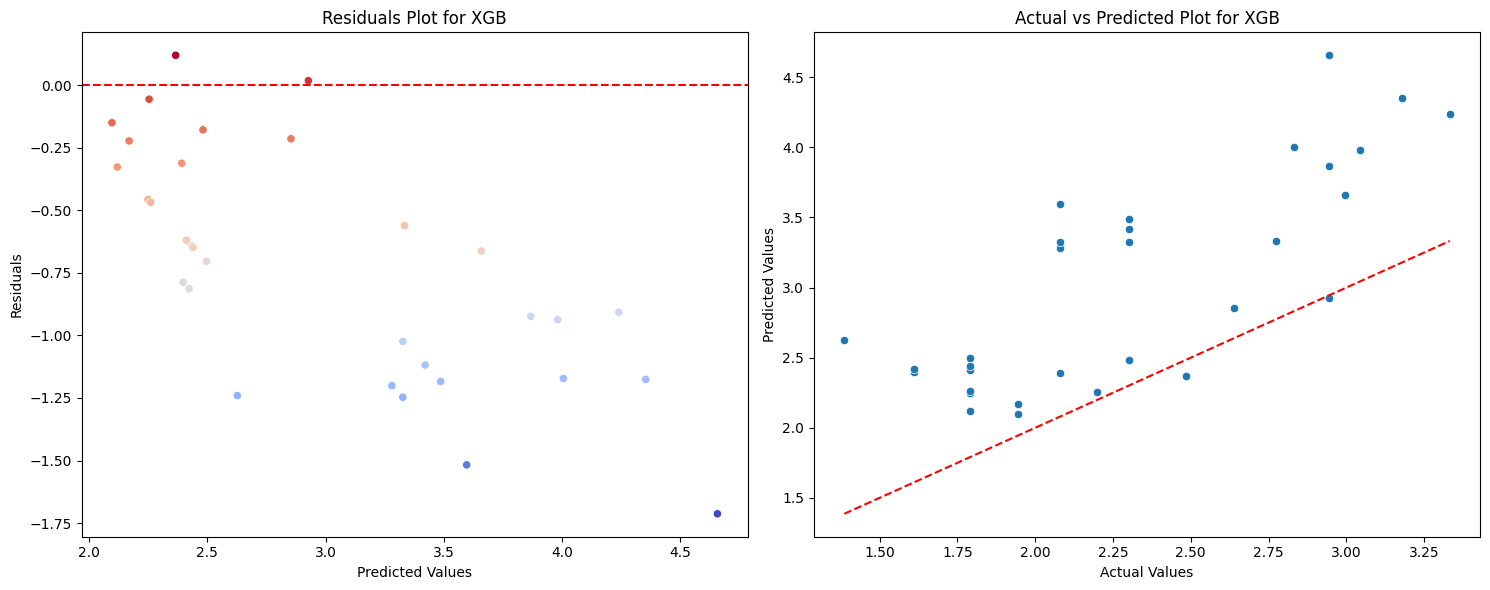

In [11]:
# Actuals vs Preds NEW UNSEEN DATA 
actuals = np.log(df['Gls'])
residuals_plot(actuals = actuals, preds = preds, model_name='XGB')

# Residual Interpretation 
#### There is some clustering and a downward trend suggesting the model is not fitting well

# Actuals VS Predictions 
#### The actuals are off from the predictions suggesting a higher than trained error rate 

In [12]:
 # Accuracies
regression_acc(actuals, preds, model = 'xgb')

     MAE    MSE   RMSE Model
0  0.729  0.729  0.854   xgb


,MAE,MSE,RMSE,Model
0,0.729,0.729,0.854,xgb


# Summary of Results 

***

#### The original XGB Regressor model performed the best on the training data with an RMSE of .647. The results of the fitted model on the new data for the current season has an RMSE of .854 which is higher than all models that were tested. This increase in RMSE may be due to the nature of the training data. The training data does not contain a robust set of features and therefore does not generalize well on new data. To Improve this model, more features can be collected and the model can be retrained to improve error rates. Different models can be tested to determine the generalization